In [1]:
!cd data; gdown 1SqlByPMwf6EcTJNrvlpRn5-GEO9DiYhI #interior_room.xyz

Downloading...
From: https://drive.google.com/uc?id=1SqlByPMwf6EcTJNrvlpRn5-GEO9DiYhI
To: /app/notebooks/siren_sdf/data/interior_room.xyz
100%|█████████████████████████████████████████| 580M/580M [00:02<00:00, 230MB/s]


In [2]:
!cd data; gdown 1tkrHBciOzGLKZP0Pd9ye0Yz71JMdAtfl #thai_statue.xyz

Downloading...
From: https://drive.google.com/uc?id=1tkrHBciOzGLKZP0Pd9ye0Yz71JMdAtfl
To: /app/notebooks/siren_sdf/data/thai_statue.xyz
100%|████████████████████████████████████████| 307M/307M [00:03<00:00, 77.4MB/s]


In [7]:
from pathlib import Path
Path.ls = lambda x: list(x.iterdir())

data_dir = Path('data')
sample_pc_path = data_dir / 'interior_room.xyz'

assert sample_pc_path.exists()

In [15]:
import numpy as np
import plotly.express as px

def read_xyz_file(file_path):
    with open(file_path, 'r') as file:
        data = []
        for line in file:
            tokens = line.split()
            if len(tokens) == 6: # x, y, z, normal
                x, y, z, x_n, y_n, z_n = tokens
                data.append([float(x), float(y), float(z), float(x_n), float(y_n), float(z_n)])
        
    res = np.array(data)
    return res

def plot_point_cloud(df):
    fig = px.scatter_3d(df, x='x', y='y', z='z', opacity=0.8, size_max=10)
    fig.update_layout(scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'))
    fig.show()

In [17]:
np_pc = read_xyz_file(sample_pc_path)

In [37]:
np_pc.shape

(10250688, 6)

In [20]:
xyz_pc = np_pc[:, :3]

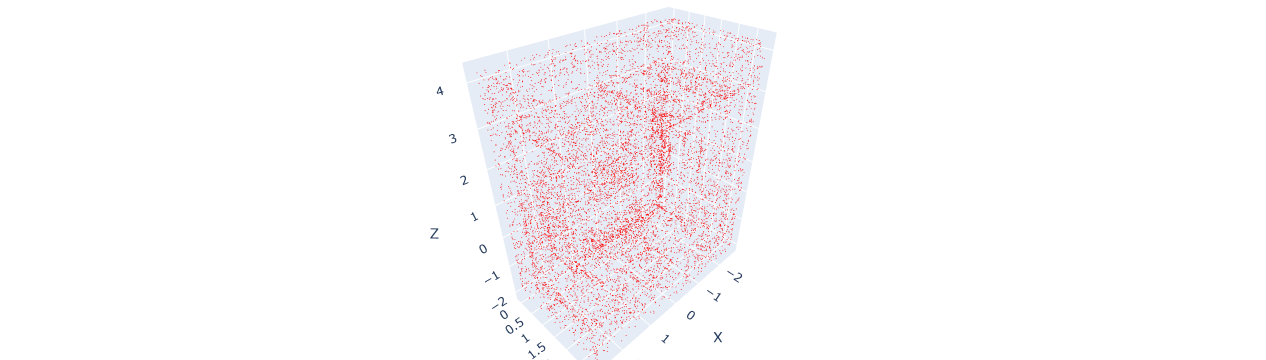

In [38]:
import plotly.graph_objs as go
import plotly.io as pio
import torch

# Generate some example point clouds
point_cloud_1 = xyz_pc[::1000]

# Create the scatter plots
trace1 = go.Scatter3d(x=point_cloud_1[:, 0], y=point_cloud_1[:, 1], z=point_cloud_1[:, 2], mode='markers',
                      marker=dict(color='red', size=0.5), name='Point Cloud 1')

# Set up the layout
layout = go.Layout(scene=dict(xaxis=dict(title='X'), yaxis=dict(title='Y'), zaxis=dict(title='Z')),
                   margin=dict(l=0, r=0, b=0, t=0))

# Create the figure and plot it
fig = go.Figure(data=[trace1], layout=layout)
pio.show(fig)